0.1 0.1


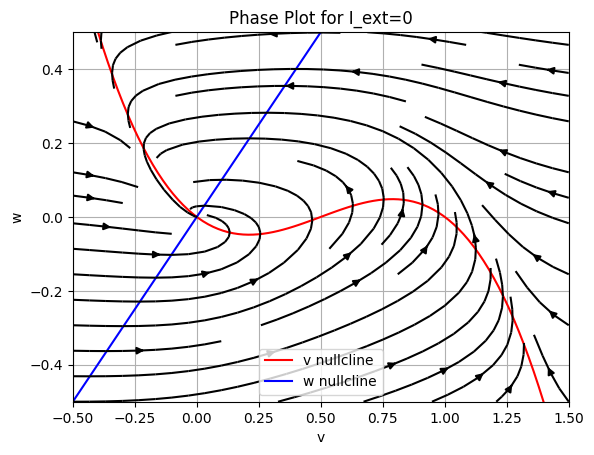

0.1 0.1


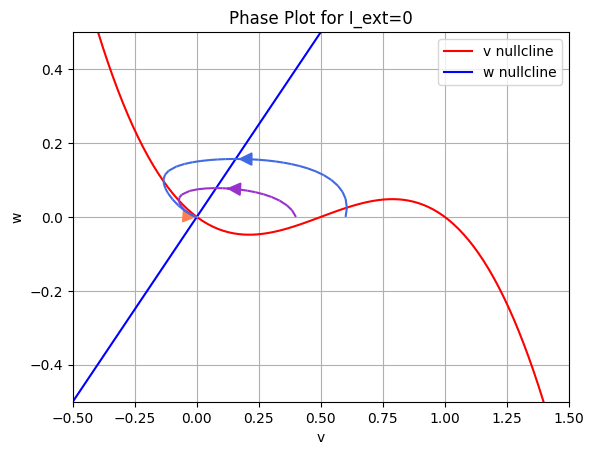

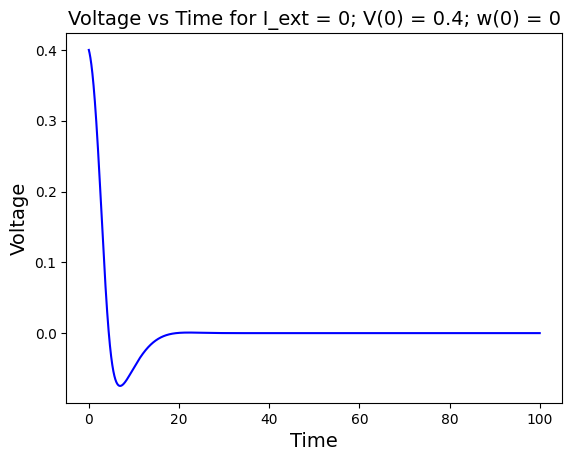

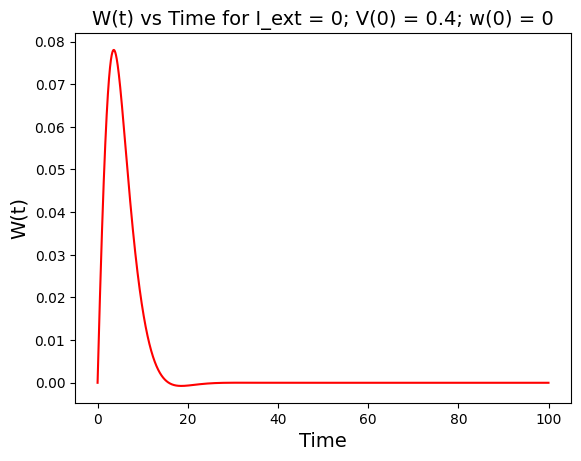

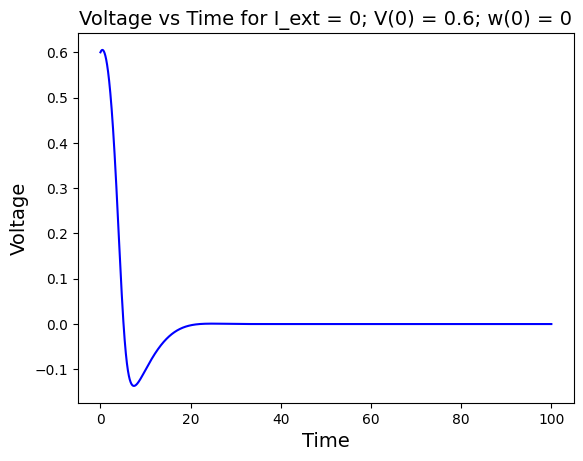

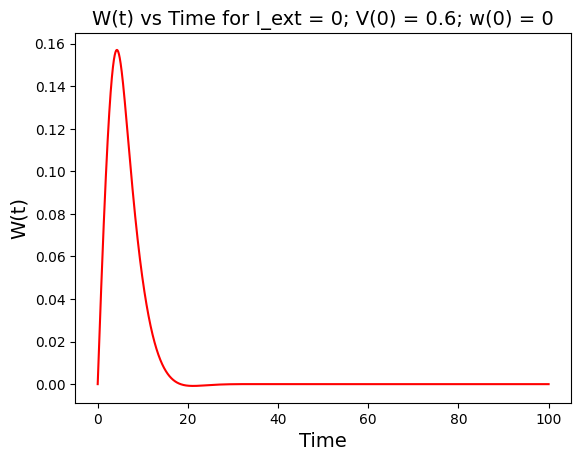

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a=0.5
b=0.1
r=0.1
def f(v):
    return v * (a - v) * (v - 1)

def dv_dt(v, w, I_ext):
    return (f(v) - w + I_ext)

def dw_dt(v, w):
    return (b * v - r * w)

def phase_plot(I_ext,x_range,y_range, positions):
  color =[ 'coral', 'darkorchid','royalblue','salmon','mediumseagreen']*3
  v = np.linspace(x_range[0], x_range[1], 100)
  w = np.linspace(x_range[0], x_range[1], 100)

  v_mesh, w_mesh = np.meshgrid(v, w)
  v_vel = dv_dt(v_mesh, w_mesh, I_ext)
  w_vel = dw_dt(v_mesh, w_mesh)

  v_nc = f(v) + I_ext
  print(b,r)
  w_nc = b*v/r


  plt.figure()
  plt.plot(v, v_nc, 'r')
  plt.plot(v, w_nc, 'b')
  plt.legend(['v nullcline', 'w nullcline'])
  plt.ylim(y_range[0], y_range[1])
  title = "Phase Plot for I_ext=" + str(I_ext)
  plt.title(title)
  plt.xlabel('v')
  plt.ylabel('w')

  if positions:
    for i in range(len(positions)):
      plt.streamplot(v_mesh, w_mesh, v_vel, w_vel, density=2, start_points=[positions[i]], color=color[i], integration_direction="forward", arrowsize=2)
  else:
    plt.streamplot(v_mesh, w_mesh, v_vel, w_vel, color='black')
  plt.grid()
  plt.show()


def simulate_FHN(I_ext,v_init,w_init):

    dt=0.01
    T=100
    num_steps = int(T / dt)
    v_values = np.zeros(num_steps, dtype = float)
    w_values = np.zeros(num_steps, dtype = float)

    v = v_init  # Initial condition for v
    w = w_init  # Initial condition for w

    for i in range(num_steps):
        v_values[i] = v
        w_values[i] = w

        dv = dv_dt(v, w, I_ext)*dt
        dw = dw_dt(v, w)*dt

        v += dv
        w += dw

    plt.plot( np.arange(0,T,dt),v_values,color='blue')
    plt.xlabel("Time",fontsize = 14)
    plt.ylabel("Voltage",fontsize=14)
    plt.title("Voltage vs Time for I_ext = {0}; V(0) = {1}; w(0) = 0".format(I_ext, v_init,w_init),fontsize = 14)
    plt.show()

    plt.plot( np.arange(0,T,dt),w_values,color='red')
    plt.xlabel("Time",fontsize = 14)
    plt.ylabel("W(t)",fontsize = 14)
    plt.title("W(t) vs Time for I_ext = {0}; V(0) = {1}; w(0) = 0".format(I_ext,v_init, w_init),fontsize = 14)
    plt.show()

# case 1 I_ext =0
phase_plot(0,(-0.5,1.5), (-0.5,0.5), [])
phase_plot(0,(-0.5,1.5), (-0.5,0.5),[[0,0], [0.4,0], [0.6, 0]])
# case 1 (a):  V(0) < a and W(0) = 0
simulate_FHN(I_ext=0, v_init =0.4 , w_init = 0)
# case 2 (a):  V(0) > a and W(0) = 0
simulate_FHN(I_ext=0, v_init = 0.6 , w_init = 0 )

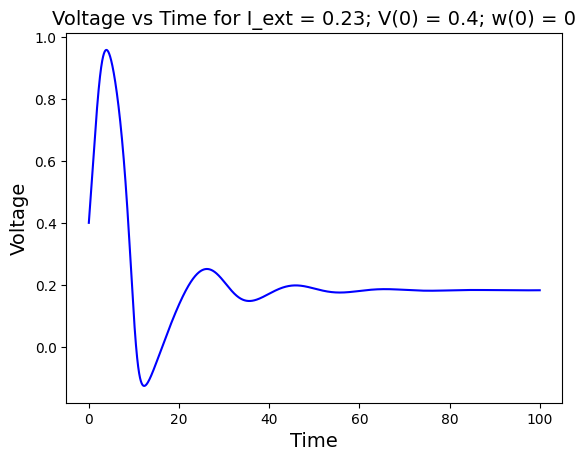

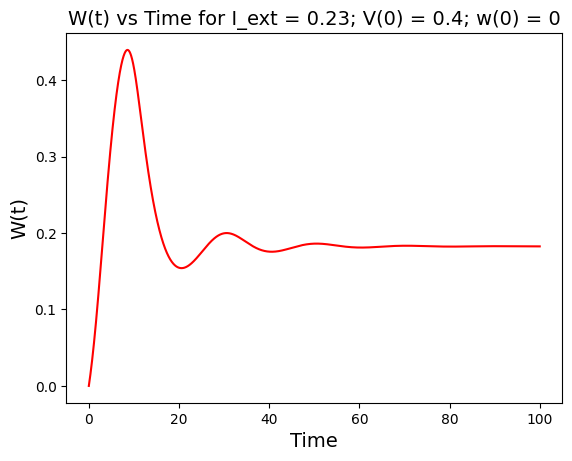

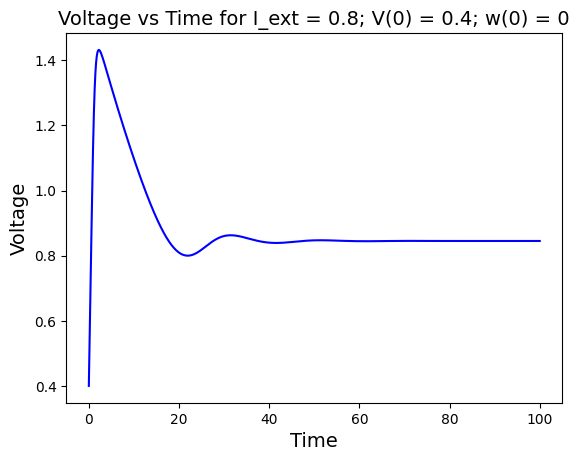

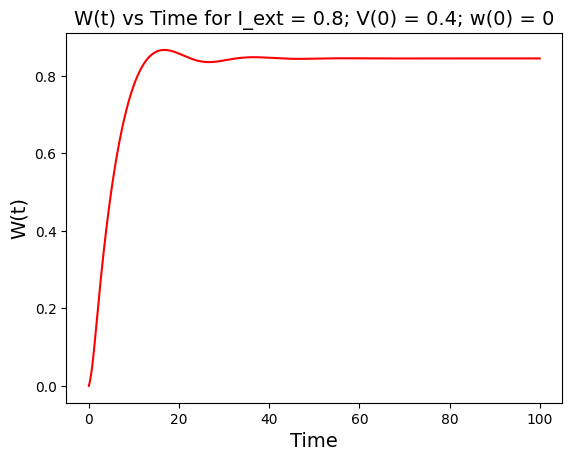

In [ ]:
simulate_FHN(I_ext=0.23, v_init =0.4 , w_init = 0)
simulate_FHN(I_ext=0.8, v_init =0.4 , w_init = 0)

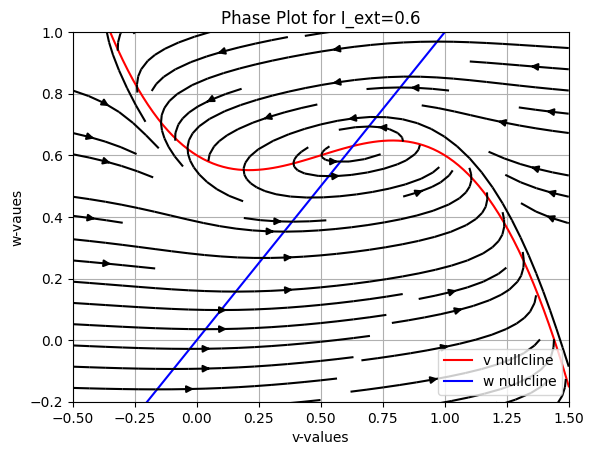

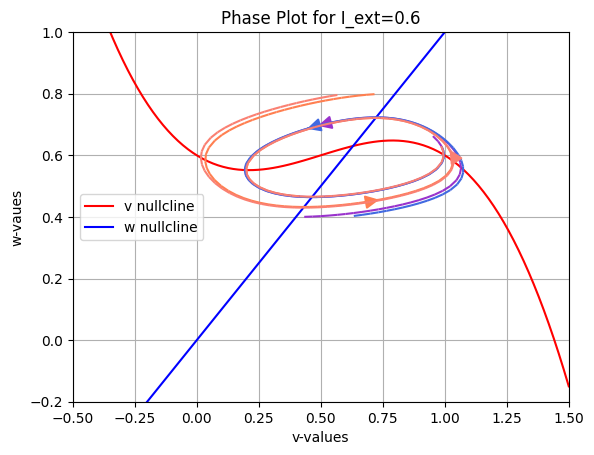

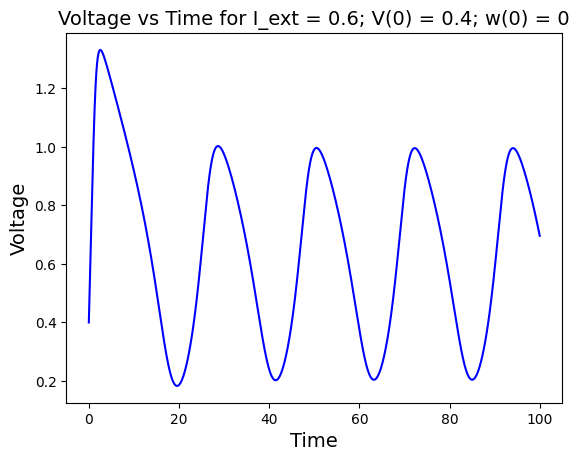

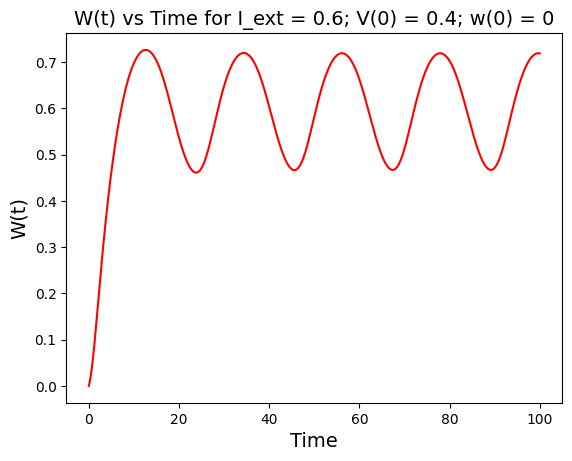

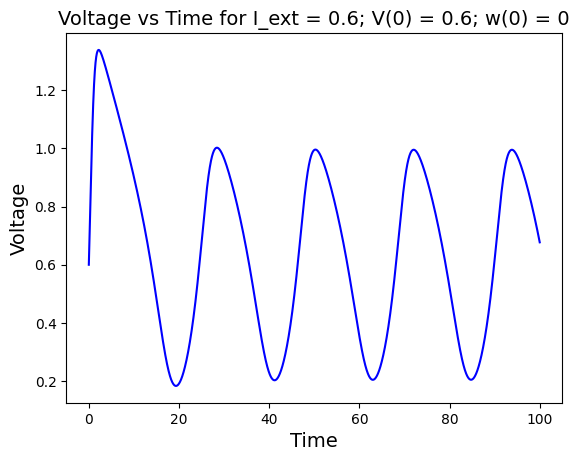

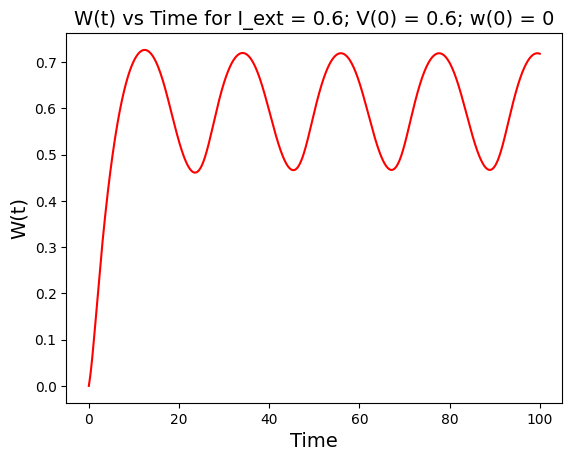

In [ ]:
# Case 2: I_ext = 0.6
phase_plot(0.6,(-0.5,1.5), (-0.2,1), [])
phase_plot(0.6,(-0.5,1.5), (-0.2,1),[[0.75,0.8],[0.4,0.4], [0.6,0.4],[0.6,0.8]])
simulate_FHN(I_ext=0.6, v_init =0.4 , w_init = 0)
simulate_FHN(I_ext=0.6, v_init =0.6 , w_init = 0)

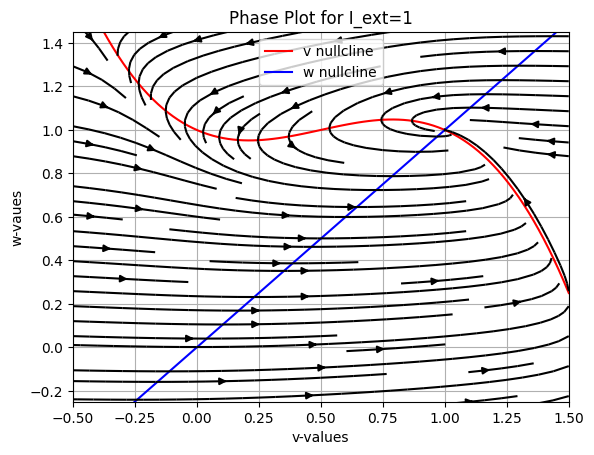

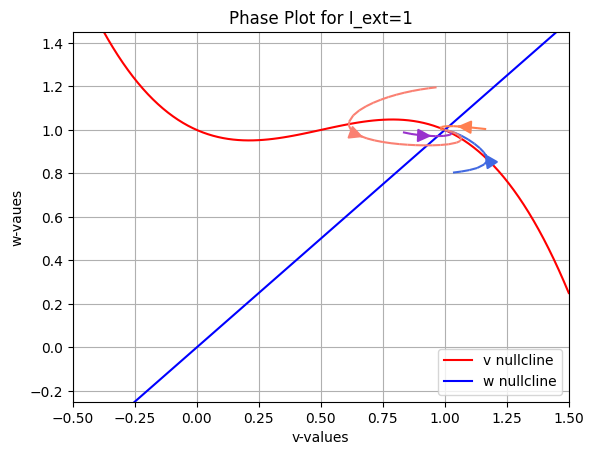

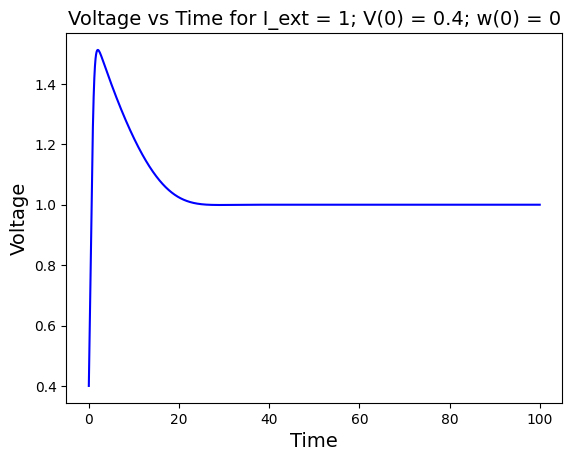

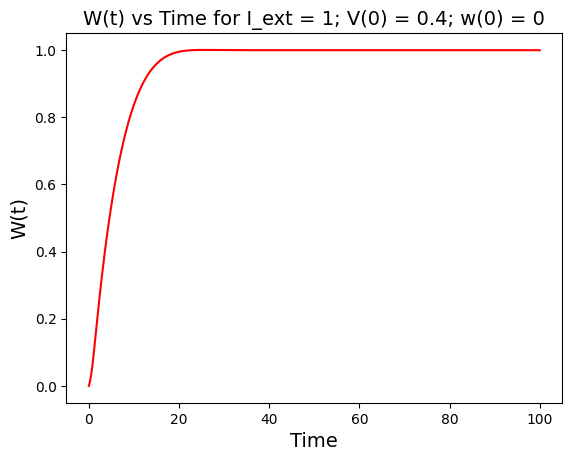

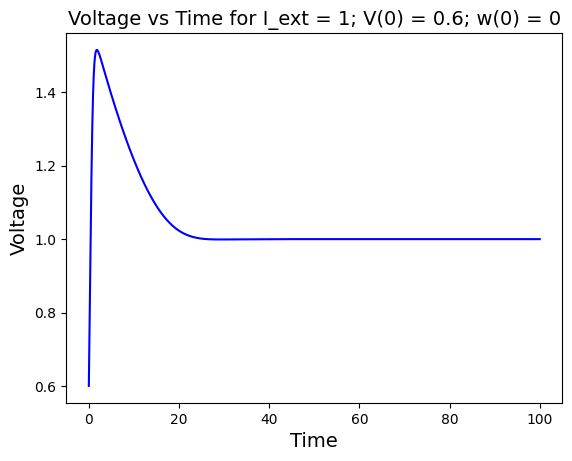

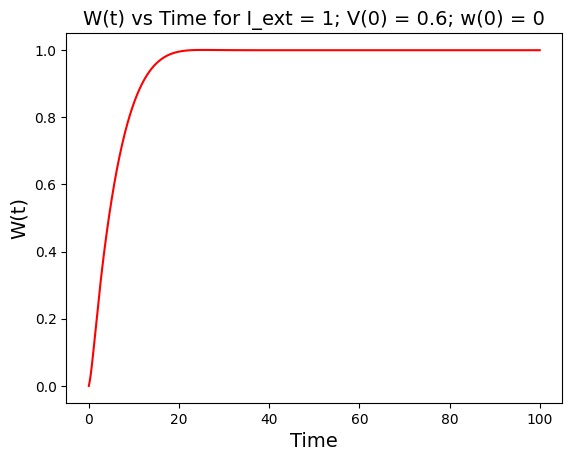

In [ ]:
# Case 3: I_ext = 1
phase_plot(1,(-0.5,1.5), (-0.25,1.45), [])
phase_plot(1,(-0.5,1.5), (-0.25,1.45),[[1.2,1], [0.8,1], [1,0.8 ], [1, 1.2]])
simulate_FHN(I_ext=1, v_init =0.4 , w_init = 0)
simulate_FHN(I_ext=1, v_init =0.6 , w_init = 0)


0.02 0.7


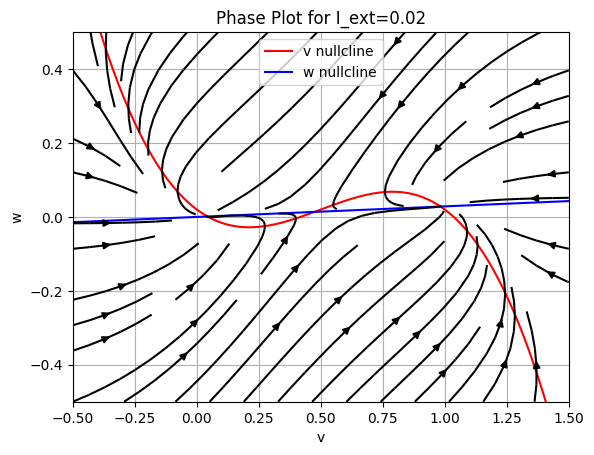

0.02 0.7


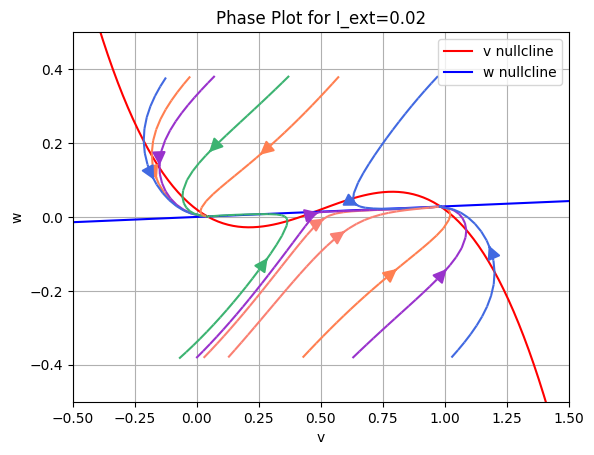

0.02 0.7


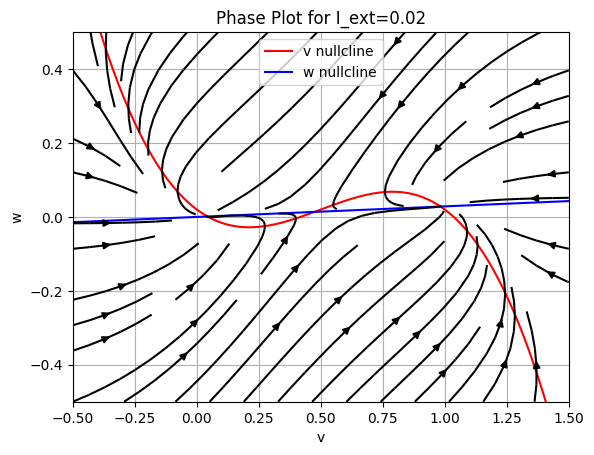

0.02 0.7


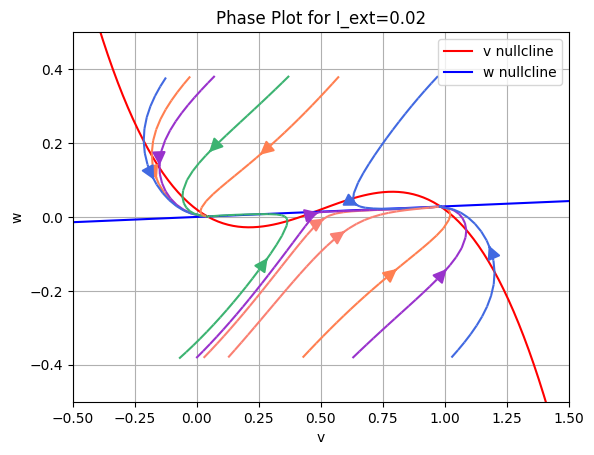

In [100]:
# Case 4: I_ext = 0.02
b, r = 0.02, 0.7
phase_plot(0.02,(-0.5,1.5), (-0.5,0.5), [])
phase_plot(0.02,(-0.5,1.5), (-0.5,0.5),[[0,0.4], [0.1,0.4], [-0.1,0.4], [0,-0.4], [0.4,0.4], [0.6, 0.4], [-0.03,-0.4], [1, 0.4],[0.1,-0.4], [-0.1,-0.4], [0.4,-0.4], [0.6, -0.4], [1, -0.4]])


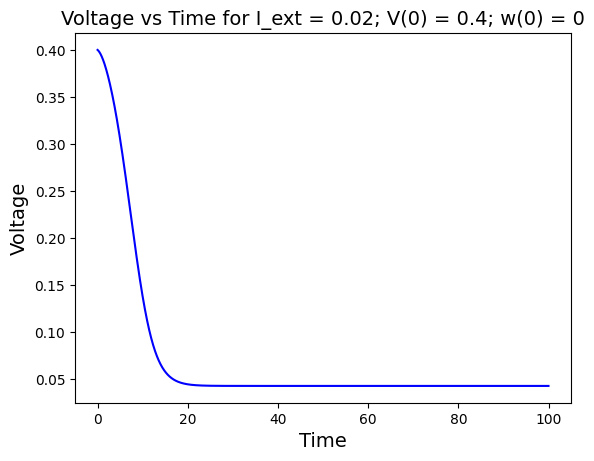

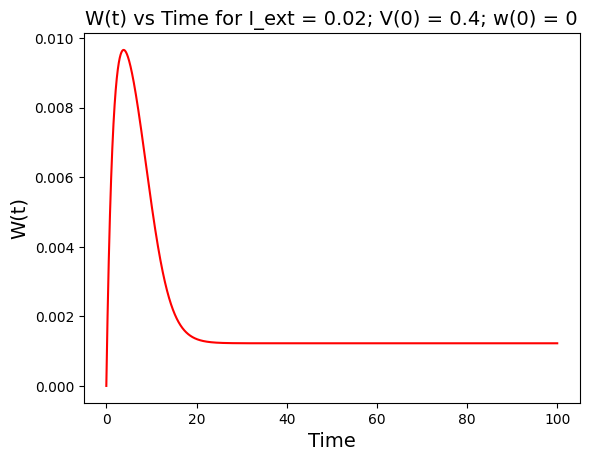

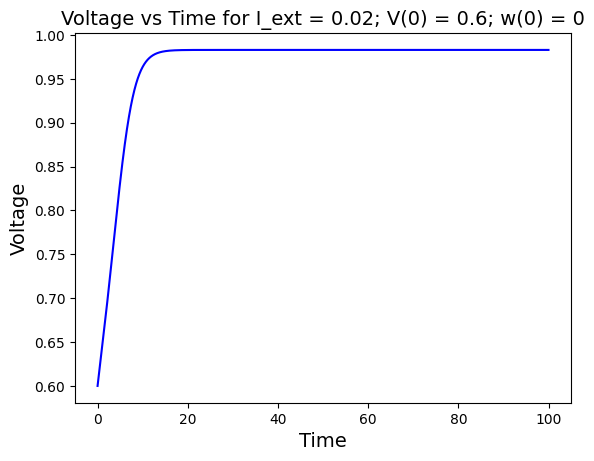

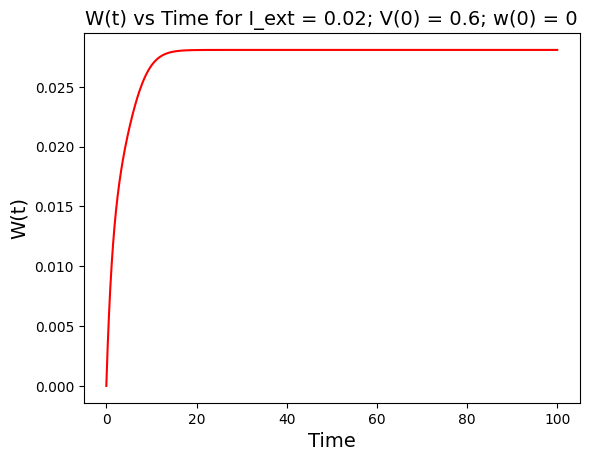

In [95]:
simulate_FHN(I_ext=0.02, v_init =0.4 , w_init = 0)
simulate_FHN(I_ext=0.02, v_init =0.6 , w_init = 0)